In [1]:
import time
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [2]:
""" 
读取数据集
"""
# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [3]:
""" 
分析数据集
！！！ 数据分析在计算机科学领域往往扮演着十分重要的角色，虽然它很容易被忽略。我们是从网络上下载的数据集，所以更需要打开黑盒子，看看里面有什么东西。
"""
# 查看下类型
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [4]:
# 确定了数据类型，是numpy数组，我们可以直接看一下大小
print(X.shape, y.shape)

(70000, 784) (70000,)


7


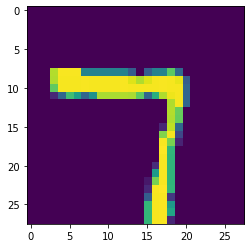

In [13]:
# X 代表的是训练数据，y代表的是训练标签，它们必须是一一对应的。
# 不难看出，我们一共有 70000个样本
# 每个训练样本有784个特征，784正好是 28x28，等于我们图片的大小。所以 784 其实就是每个图片的像素。
# 我们不妨随机挑一些图片显示出来看看

import random
i = random.randint(0,70000 -1)
img = X[i,:].reshape([28,28])
print(y[i])
plt.imshow(img)

In [16]:
# 打乱数据
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X_ = X[permutation]
y_ = y[permutation]

# Turn down for faster convergence
train_samples = 70000 - 7000
X_train, X_test, y_train, y_test = train_test_split(
    X_, y_, train_size=train_samples, test_size=7000
)

#  归一化，数据清晰
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit to data then transform
X_test = scaler.transform(X_test)

In [17]:
""" 训练 """
t0 = time.time()
# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train) # 喂给
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)
run_time = time.time() - t0
print(f"Example run in {run_time:.3f} s")

Sparsity with L1 penalty: 83.95%
Test score with L1 penalty: 0.8316
Example run in 34.654 s


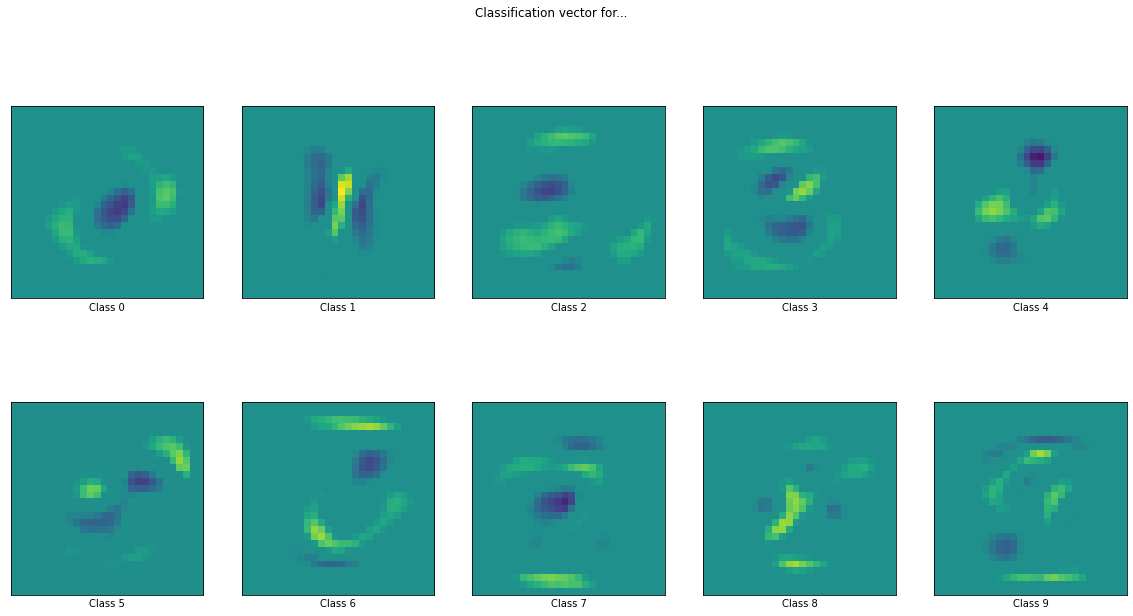

In [19]:
coef = clf.coef_.copy() # 复制模型参数
# print(coef)
plt.figure(figsize=(20, 10))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        # cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")
plt.show()

In [ ]:
# 思考一下这个算法有没有什么问题？